In [2]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=20,10

In [26]:
df=pd.read_csv('dataset/fifa_ols.csv', index_col=0)
df.head()

,Wage,Value,Overall,Over_C,Potential,Special,Special_C,Age,Age_C,Club_V,Club_N,International Reputation,Position_Class,Composure_C
0,565000.0,110500000.0,94,18,94,2202,1,31,6,3,16,5.0,3,3.0
1,405000.0,77000000.0,94,18,94,2228,1,33,7,3,15,5.0,3,3.0
2,290000.0,118500000.0,92,17,93,2143,1,26,4,3,14,5.0,3,3.0
3,260000.0,72000000.0,91,16,93,1471,0,27,5,3,13,4.0,0,3.0
4,355000.0,102000000.0,91,16,92,2281,1,27,5,3,13,4.0,2,3.0


In [28]:
df[['Value']]

,Value
0,110500000.0
1,77000000.0
2,118500000.0
3,72000000.0
4,102000000.0
...,...
18202,60000.0
18203,60000.0
18204,60000.0
18205,60000.0


In [31]:
df[['Wage']]

,Wage
0,565000.0
1,405000.0
2,290000.0
3,260000.0
4,355000.0
...,...
18202,1000.0
18203,1000.0
18204,1000.0
18205,1000.0


In [10]:
df['IR']=df['International Reputation']
df.drop('International Reputation', axis=1, inplace=True)

In [11]:
df.drop('Composure_C', axis=1, inplace=True)

In [12]:
lm_fifa=smf.ols('Wage~ Value + Overall + Potential + Special + Age + Club_V + IR + Position_Class', data=df).fit()
lm_fifa.params

Intercept        -6330.681310
Value                0.002928
Overall           -174.872237
Potential          -24.608490
Special              1.926011
Age                276.629518
Club_V            1402.792086
IR                9513.656824
Position_Class    -255.683837
dtype: float64

In [14]:
lm_fifa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     7156.
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:05:04   Log-Likelihood:            -1.9185e+05
No. Observations:               17918   AIC:                         3.837e+05
Df Residuals:                   17909   BIC:                         3.838e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6330.6813   1693.505     -3.738      0.000   -9650.114   -3011.249
Value              0.0029   2.32e-05    126.388      0.000       0.003       0.003
Overall         -174.8722     35.273     -4.958      0.000    -244.010    -105.735
Potential        -24.6085     32.672     -0.753      0.451     -88.649      39.432
Special            1.9260      0.447      4.307      0.000       1.049       2.803
Age              276.6295     36.357      7.609      0.000     205.367     347.892
Club_V          1402.7921     95.006     14.765      0.000    1216.571    1589.013
IR              9513.6568    284.980     33.384      0.000    8955.068    1.01e+04
Position_Class  -255.6838    105.710     -2.419      0.016    -462.885     -48.483
==============================================================================
Omnibus:                    11518.824   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2120457.054
Skew:                           2.064   Prob(JB):                         0.00
Kurtosis:                      56.134   Cond. No.                     1.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
sm.stats.anova_lm(lm_fifa).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
Value,1.0,6.467469e+12,6.467469e+12,55331.122,0.000
Overall,1.0,1.707097e+10,1.707097e+10,146.047,0.000
Potential,1.0,1.055352e+10,1.055352e+10,90.288,0.000
Special,1.0,6.182465e+07,6.182465e+07,0.529,0.467
Age,1.0,3.459179e+10,3.459179e+10,295.943,0.000
Club_V,1.0,3.080794e+10,3.080794e+10,263.571,0.000
IR,1.0,1.301829e+11,1.301829e+11,1113.753,0.000
Position_Class,1.0,6.838197e+08,6.838197e+08,5.850,0.016
Residual,17909.0,2.093323e+12,1.168866e+08,NaN,NaN


In [15]:
lm_fifa2=smf.ols('Wage~ Value  + IR+ Age + Club_V+ Overall + Potential+ Position_Class + Special', data=df).fit()
sm.stats.anova_lm(lm_fifa2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
Value,1.0,6.467469e+12,6.467469e+12,55331.122,0.000
IR,1.0,1.814198e+11,1.814198e+11,1552.100,0.000
Age,1.0,1.445666e+10,1.445666e+10,123.681,0.000
Club_V,1.0,1.999432e+10,1.999432e+10,171.057,0.000
Overall,1.0,5.745217e+09,5.745217e+09,49.152,0.000
Potential,1.0,1.663830e+08,1.663830e+08,1.423,0.233
Position_Class,1.0,2.152363e+06,2.152363e+06,0.018,0.892
Special,1.0,2.168206e+09,2.168206e+09,18.550,0.000
Residual,17909.0,2.093323e+12,1.168866e+08,NaN,NaN


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
X=df[['Value']]
y=df[['Wage']]

X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2, 
                                                       random_state=156)
lr=LinearRegression()
lr.fit(X_train ,y_train )
pred = lr.predict(X)

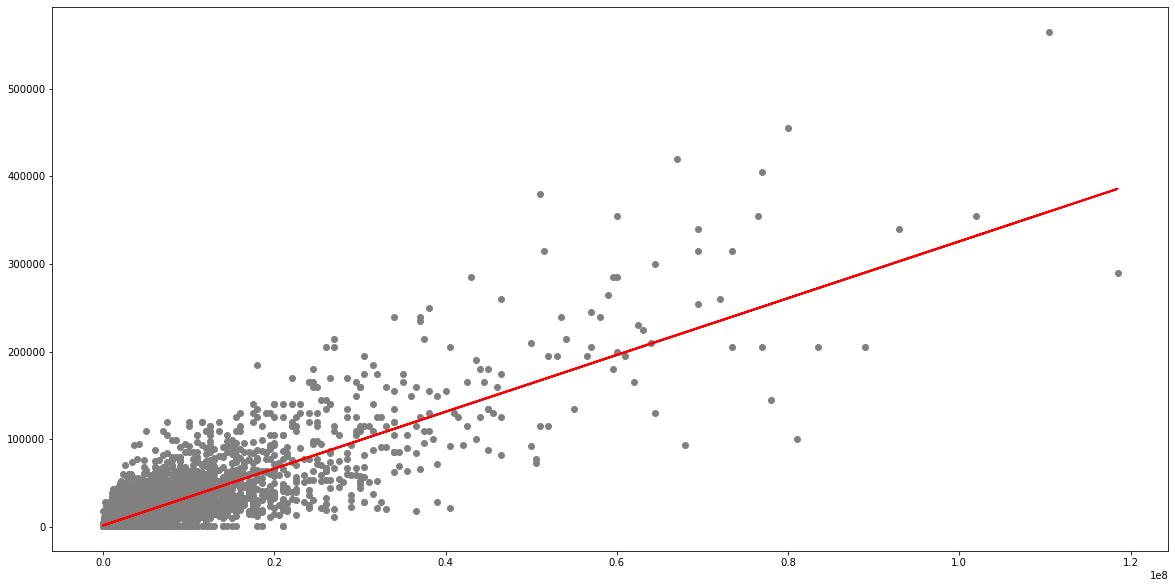

In [36]:
plt.scatter(X['Value'], y, color = 'gray')
plt.plot(X['Value'], pred, color='red', linewidth=2)
plt.show()

In [37]:
import statsmodels.formula.api as Quantreg
mod=smf.quantreg('Wage~Value', df)

quantiles=np.arange(.05,.96,.1) 

def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Value']] +\
    res.conf_int().loc['Value'].tolist()
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('Wage ~ Value', df).fit()
ols_ci = ols.conf_int().loc['Value'].tolist()
ols = dict(a=ols.params['Intercept'],
          b = ols.params['Value'],
          lb= ols_ci[0],
          ub= ols_ci[1])
print(models)
print(ols)

C:\Users\admin\anaconda3\envs\bs\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\admin\anaconda3\envs\bs\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
C:\Users\admin\anaconda3\envs\bs\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      q            a         b        lb        ub
0  0.05   615.751802  0.000668  0.000667  0.000670
1  0.15   527.272729  0.001455  0.001452  0.001457
2  0.25   592.149261  0.001942  0.001939  0.001946
3  0.35   664.670657  0.002395  0.002392  0.002399
4  0.45   714.285714  0.002857  0.002853  0.002861
5  0.55   793.763287  0.003437  0.003432  0.003442
6  0.65  1011.500741  0.003883  0.003875  0.003890
7  0.75  1329.067328  0.004596  0.004586  0.004606
8  0.85  2054.314499  0.005563  0.005548  0.005578
9  0.95  4891.891902  0.007297  0.007260  0.007334
{'a': 1623.1797418100225, 'b': 0.003373548739695855, 'lb': 0.0033439777703764303, 'ub': 0.0034031197090152797}


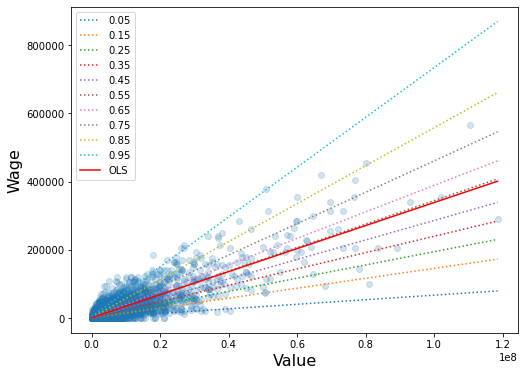

In [38]:
x= np.arange(df.Value.min(), df.Value.max(), 50)
get_y = lambda a,b : a+b*x

fig, ax = plt.subplots(figsize=(8,6))
for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x,y,linestyle='dotted', label=str(round(0.05+i*0.1,2)))
    
y = get_y(ols['a'], ols['b'])

ax.plot(x,y, color='red', label = 'OLS')
ax.scatter(df.Value, df.Wage, alpha = .2)
legend= ax.legend()
ax.set_xlabel('Value', fontsize=16)
ax.set_ylabel('Wage', fontsize=16);

In [ ]:
기존의 선형 회귀선은 (a=0.55) 전후에 위치함을 알 수 있다.